# **INTRODUCTION**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

The dataset contains 15 columns, including the following key features:

Date and Time: Indicating when the data was recorded.

Air pollutants: Measurements for CO(GT), NMHC(GT), NOx(GT), NO2(GT), C6H6(GT).

Sensor readings: PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3).

Weather and humidity: Temperature (T), Relative Humidity (RH), Absolute Humidity (AH).

Here we have **CO** as specific target variable for prediction.



**1. DATA PREPARATION**


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


print("Please upload the AirQualityUCI.xlsx file")
uploaded = files.upload()


file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)






Please upload the AirQualityUCI.xlsx file


Saving AirQualityUCI (2).xlsx to AirQualityUCI (2).xlsx


In [ ]:
#Inspect the Dataset

df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
df.describe()

Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
std                              NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%       4.004958     711.000000    50.000000    637.000000    53.000000   
50%       7.886653     894.500000   141.000000    794.250000    96.000000   
75%      13.636091    1104.750000   284.200000    960.250000   133.000000   
max      63.741476    2214.000000  1479.000000   2682.750000   339.700000   
std      41.380154     342.315902   257.424561    321.977031   126.931428   

       PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  
count   9357.000000  9357.000000  9357.000000  9357.000000  9357.000000  
mean    1391.363266   974.951534     9.776600    39.483611    -6.837604  
min     -200.000000  -200.000000  -200.000000  -200.000000  -200.000000  
25%     1184.750000   699.750000    10.950000    34.050000     0.692275  
50%     1445.500000   942.000000    17.200000    48.550000     0.976823  
75%     1662.000000  1255.250000    24.075000    61.875000     1.296223  
max     2775.000000  2522.750000    44.600000    88.725000     2.231036  
std      467.192382   456.922728    43.203438    51.215645    38.976670

In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9352    False
9353    False
9354    False
9355    False
9356    False
Length: 9357, dtype: bool

Encoding Categorical Variables:

pd.get_dummies(): Converts categorical columns to binary variables, creating dummy columns for each unique value.
LabelEncoder (if used): Assigns an integer to each category. Use LabelEncoder() if you have ordinal data or if one-hot encoding isn’t suitable.
Scaling Numerical Features:

StandardScaler: Standardizes the data (mean = 0, standard deviation = 1), which works well for data with a normal distribution.
MinMaxScaler: Scales data to a [0,1] range, useful when data values vary widely across features.

In [ ]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)


Categorical columns: Index(['Time'], dtype='object')


In [ ]:
# Apply pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Select only numerical columns

numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Standard scaling (mean=0, variance=1)
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("\nData after encoding and scaling:")
print(df_encoded.head())


Data after encoding and scaling:
        Date    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  0.474000     0.943393  2.211236  0.242065       0.441207   
1 2004-03-10  0.466273     0.737965  1.939383  0.182019       0.176087   
2 2004-03-10  0.468849     1.070743  1.767687  0.172368       0.130804   
3 2004-03-10  0.468849     0.990391  1.710454  0.177950       0.157097   
4 2004-03-10  0.461122     0.677322  1.502988  0.112443      -0.172294   

    NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  ...  Time_14:00:00  \
0 -0.010117      0.811833  0.432257      0.643531  ...          False   
1 -0.254862      1.176786  0.266805      0.358301  ...          False   
2 -0.146086      1.071959  0.440136      0.349204  ...          False   
3  0.013192      0.922872  0.503165      0.411815  ...          False   
4 -0.146086      1.273847  0.455893      0.211138  ...          False   

   Time_15:00:00  Time_16:00:00  Time_17:00:00  Time_18:00:00  Time_19:00:00  \
0 

#Handle Outliner
Z-score: Outliers are detected based on how many standard deviations a data point is from the mean. A common threshold is
∣Z∣>3.

IQR: Outliers are detected by identifying points that lie outside the range of
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR], where Q1 and Q3 are the first and third quartiles, respectively.

In [ ]:
def handle_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    data_no_outliers = data[(z_scores < threshold).all(axis=1)]
    return data_no_outliers


    # Apply Z-score method
df_no_outliers_z = handle_outliers_zscore(df)
print("\nData after handling outliers with Z-score method:")
print(df_no_outliers_z.info())


Data after handling outliers with Z-score method:
<class 'pandas.core.frame.DataFrame'>
Index: 8577 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8577 non-null   datetime64[ns]
 1   Time           8577 non-null   object        
 2   CO(GT)         8577 non-null   float64       
 3   PT08.S1(CO)    8577 non-null   float64       
 4   NMHC(GT)       8577 non-null   int64         
 5   C6H6(GT)       8577 non-null   float64       
 6   PT08.S2(NMHC)  8577 non-null   float64       
 7   NOx(GT)        8577 non-null   float64       
 8   PT08.S3(NOx)   8577 non-null   float64       
 9   NO2(GT)        8577 non-null   float64       
 10  PT08.S4(NO2)   8577 non-null   float64       
 11  PT08.S5(O3)    8577 non-null   float64       
 12  T              8577 non-null   float64       
 13  RH             8577 non-null   float64       
 14  AH             8577 non-nu

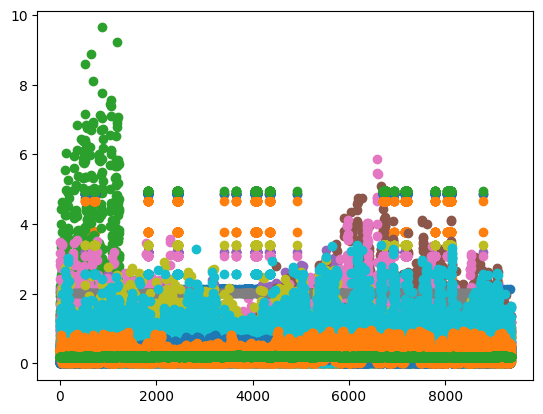

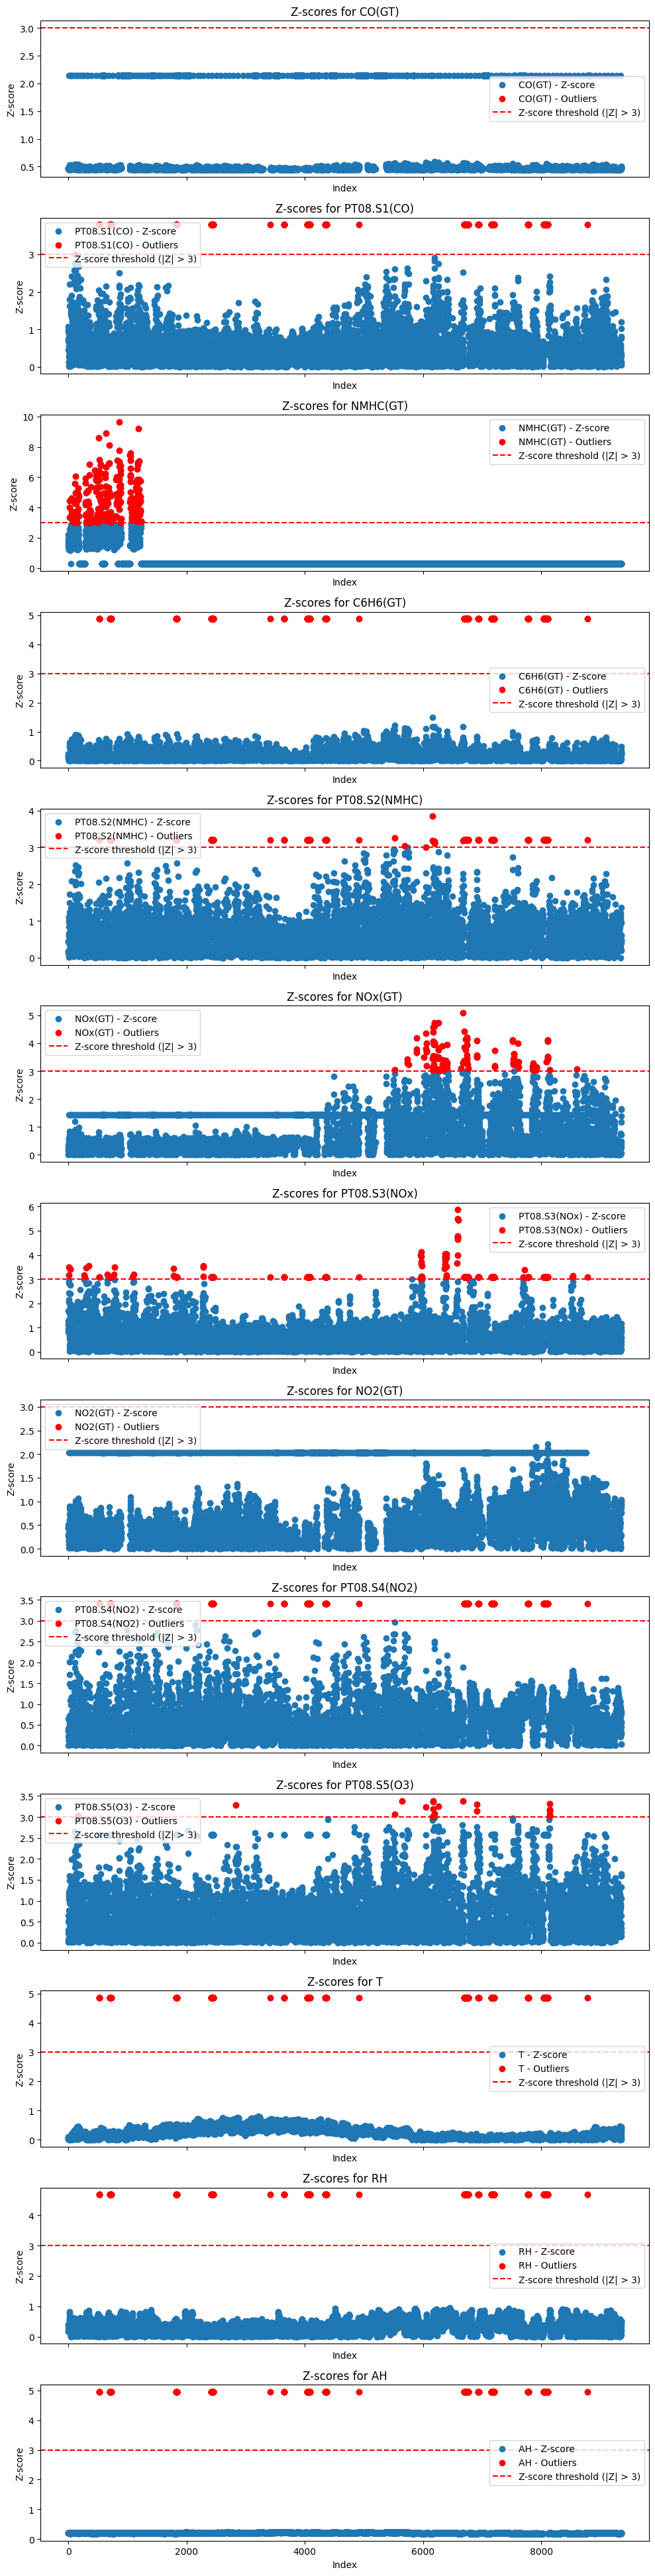

In [ ]:
numerical_data = df.select_dtypes(include=[np.number]).dropna()
for column in numerical_data.columns:
    z_scores = np.abs(stats.zscore(numerical_data[column]))
    plt.scatter(numerical_data.index, z_scores, label=column)
num_columns = numerical_data.shape[1]
fig, axes = plt.subplots(num_columns, 1, figsize=(10, num_columns * 3), sharex=True)

for i, column in enumerate(numerical_data.columns):
    z_scores = np.abs(stats.zscore(numerical_data[column]))

    # Scatter plot of all data points
    axes[i].scatter(numerical_data.index, z_scores, label=f'{column} - Z-score')


    outliers = z_scores > 3  # True for outliers
    axes[i].scatter(numerical_data.index[outliers], z_scores[outliers], color='red', label=f'{column} - Outliers')


    axes[i].axhline(y=3, color='r', linestyle='--', label='Z-score threshold (|Z| > 3)')
    axes[i].set_title(f"Z-scores for {column}")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Z-score")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Convert Date and Time columns into a single datetime feature
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
#Splitting the data
features = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                             'T', 'RH', 'AH', 'Hour', 'DayOfWeek']]
target = df['CO(GT)']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**2. DATA VISUALISATION**

a. Univariate Analysis

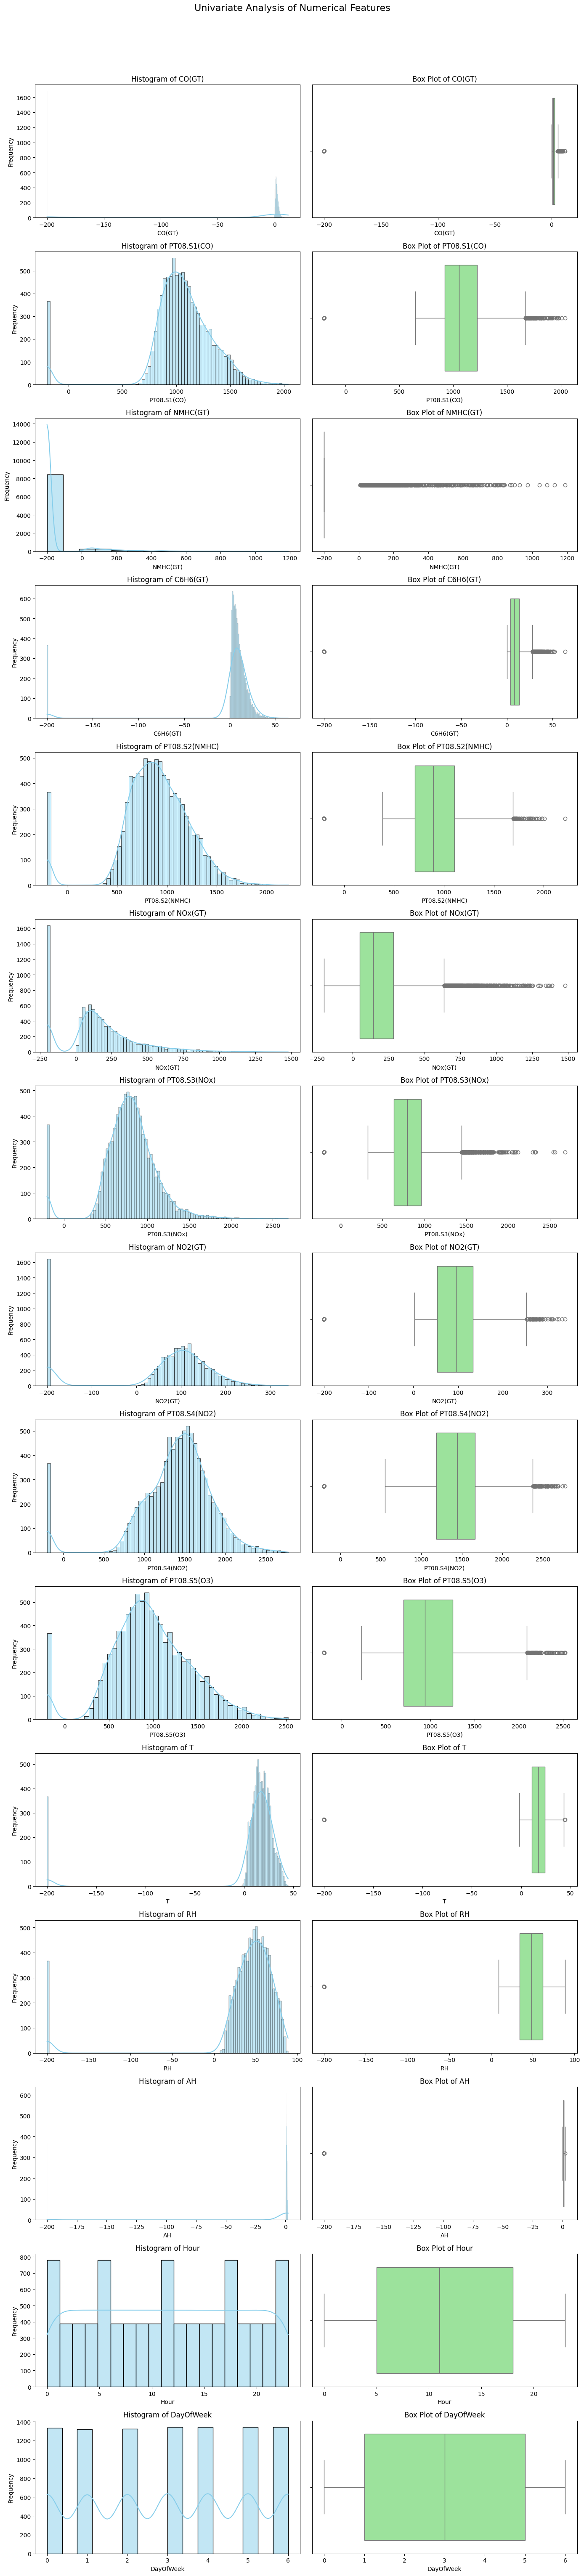

In [ ]:
import seaborn as sns
numerical_data = df.select_dtypes(include=[np.number])

# Set up the plotting area for histograms and box plots
fig, axes = plt.subplots(len(numerical_data.columns), 2, figsize=(14, 4 * len(numerical_data.columns)))
fig.suptitle("Univariate Analysis of Numerical Features", fontsize=16, y=1.02)

# Iterate over each numerical feature
for i, column in enumerate(numerical_data.columns):
    # Histogram
    sns.histplot(numerical_data[column].dropna(), kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histogram of {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Frequency")

    # Box plot
    sns.boxplot(x=numerical_data[column].dropna(), ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"Box Plot of {column}")
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

  b. Bivariate Analysis

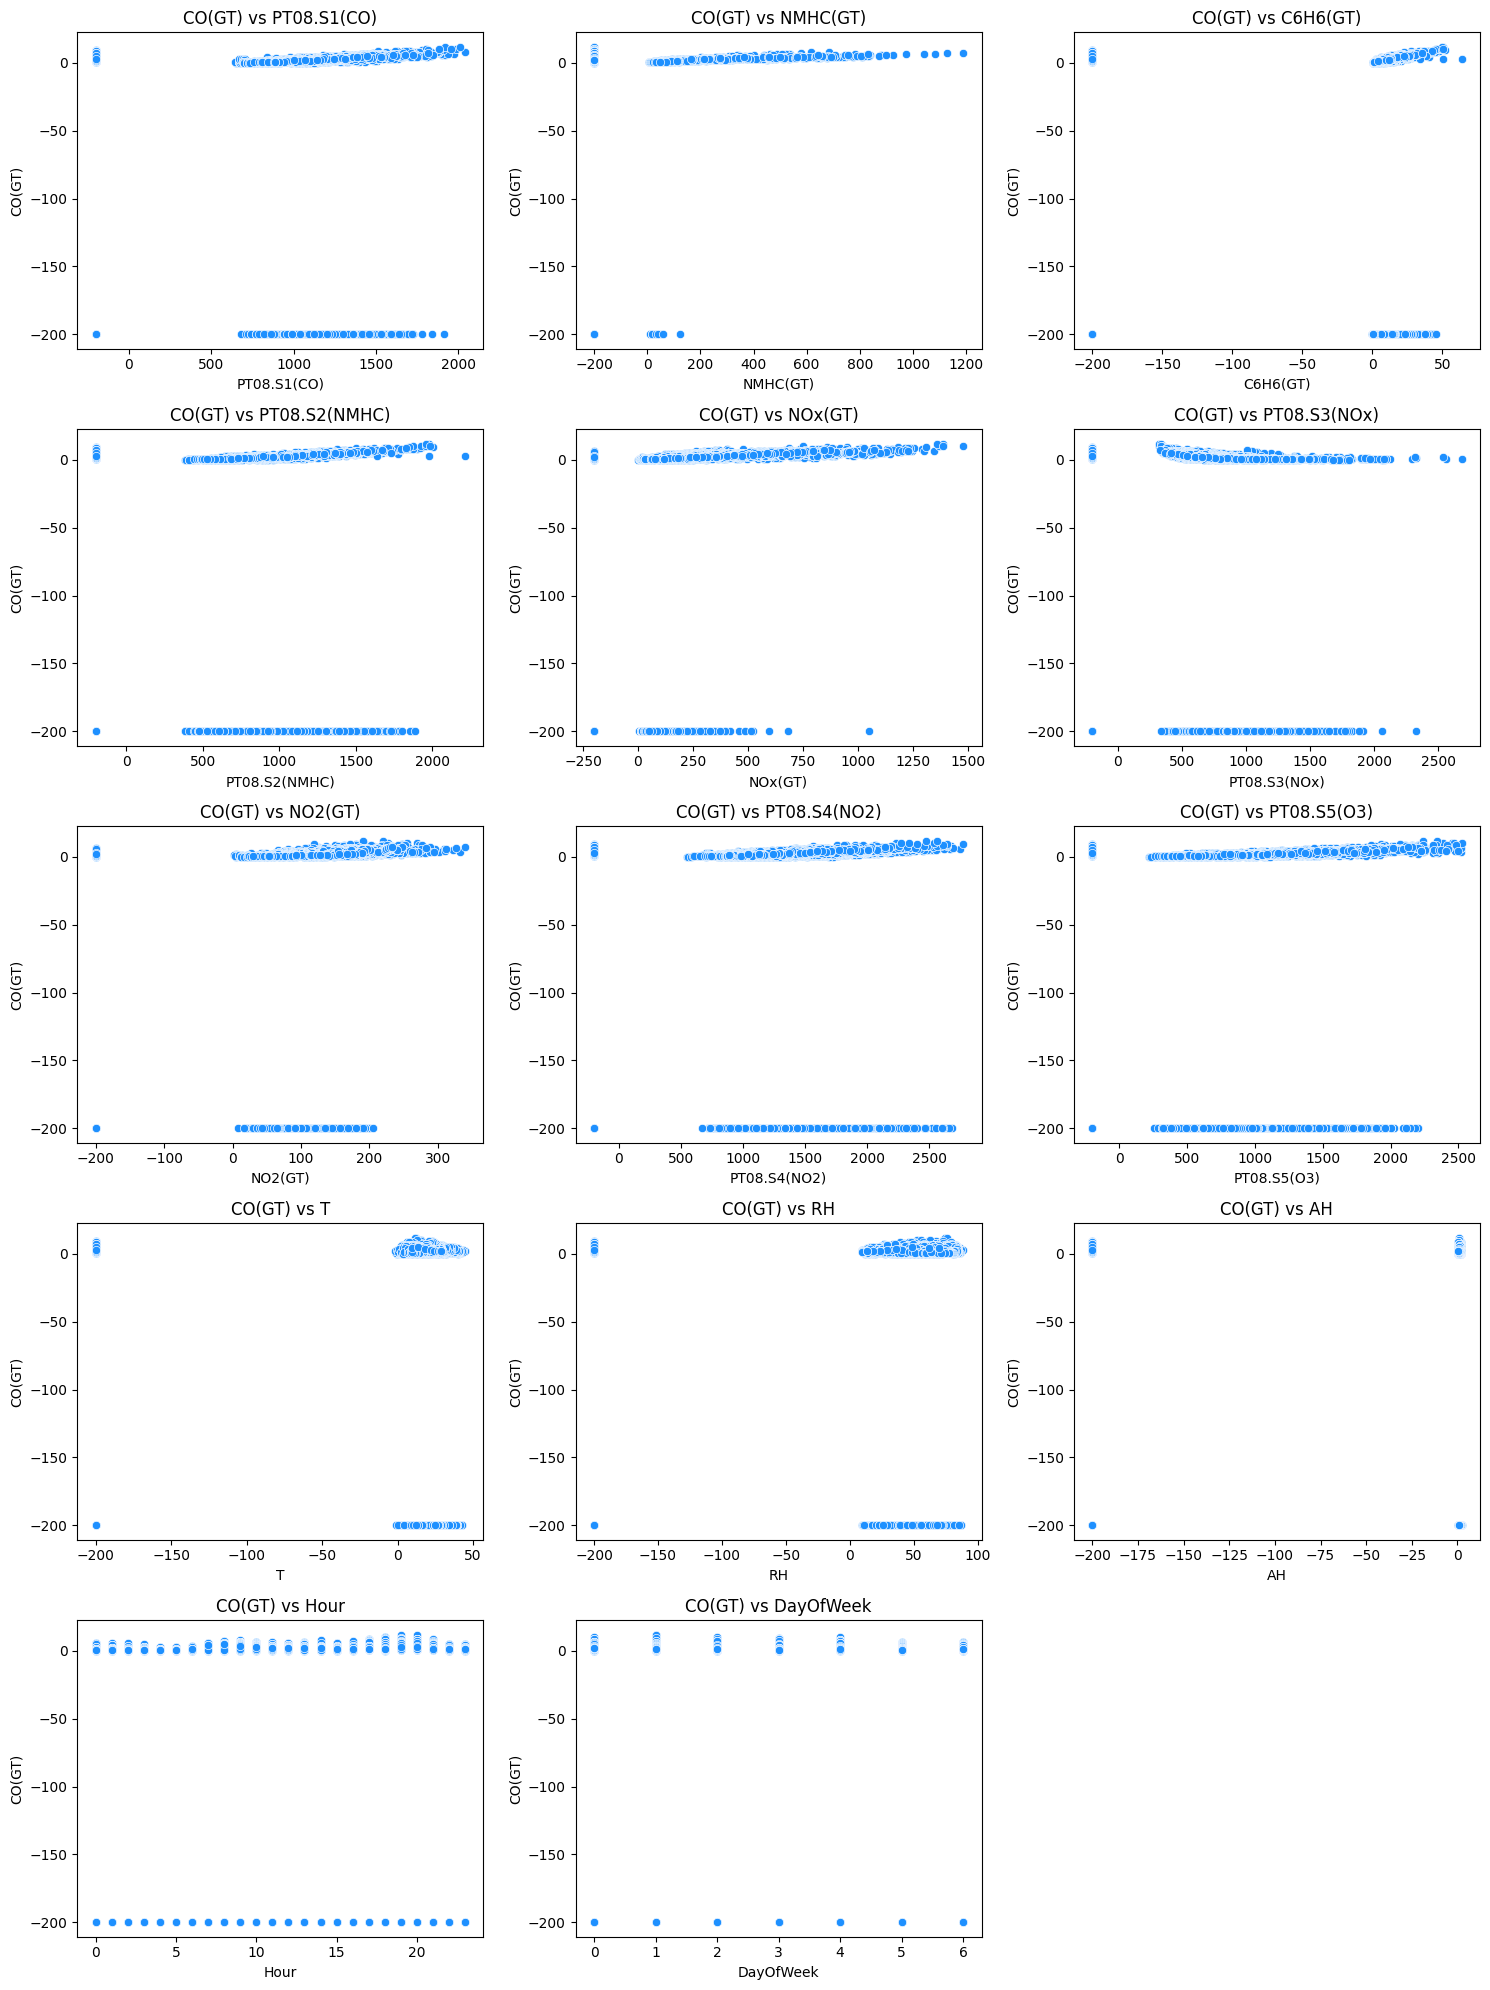

<ipython-input-15-75ec58a1483f>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=column, y=target, palette="viridis", ci="sd")
<ipython-input-15-75ec58a1483f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=column, y=target, palette="viridis", ci="sd")


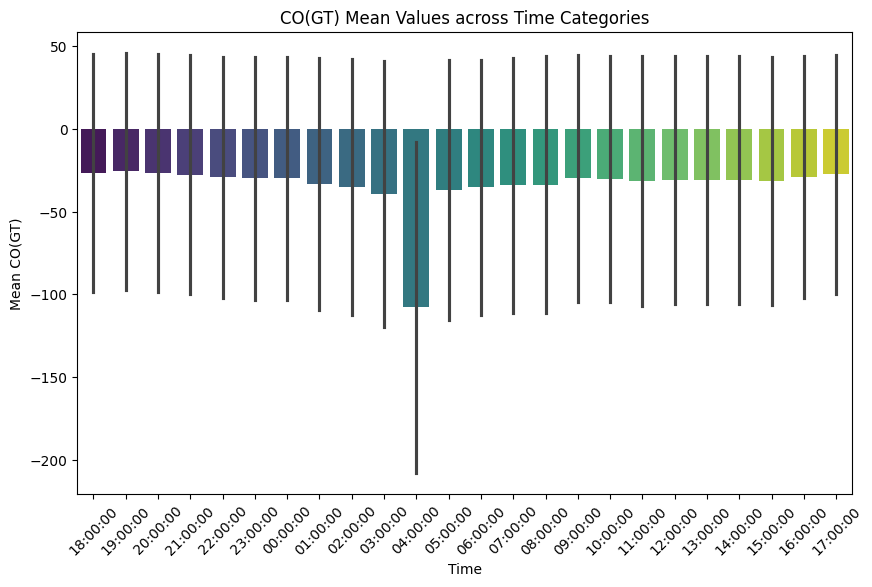

In [ ]:
from math import ceil
numerical_data = df.select_dtypes(include=[np.number])
target = 'CO(GT)'

# 1. Scatter Plot: Relationships between CO and other numerical features
features = [col for col in numerical_data.columns if col != target]

# Calculate number of rows and columns for subplots based on the number of features
num_plots = len(features)
cols = 3  # Fixed number of columns
rows = ceil(num_plots / cols)  # Dynamic number of rows

plt.figure(figsize=(5 * cols, 4 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=df, x=feature, y=target, color='dodgerblue')
    plt.title(f"{target} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

# 2. Bar Plot (if categorical features are present)
# Check if there are categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=column, y=target, palette="viridis", ci="sd")
    plt.title(f"{target} Mean Values across {column} Categories")
    plt.xlabel(column)
    plt.ylabel(f"Mean {target}")
    plt.xticks(rotation=45)
    plt.show()

 c. Multivariate Analysis

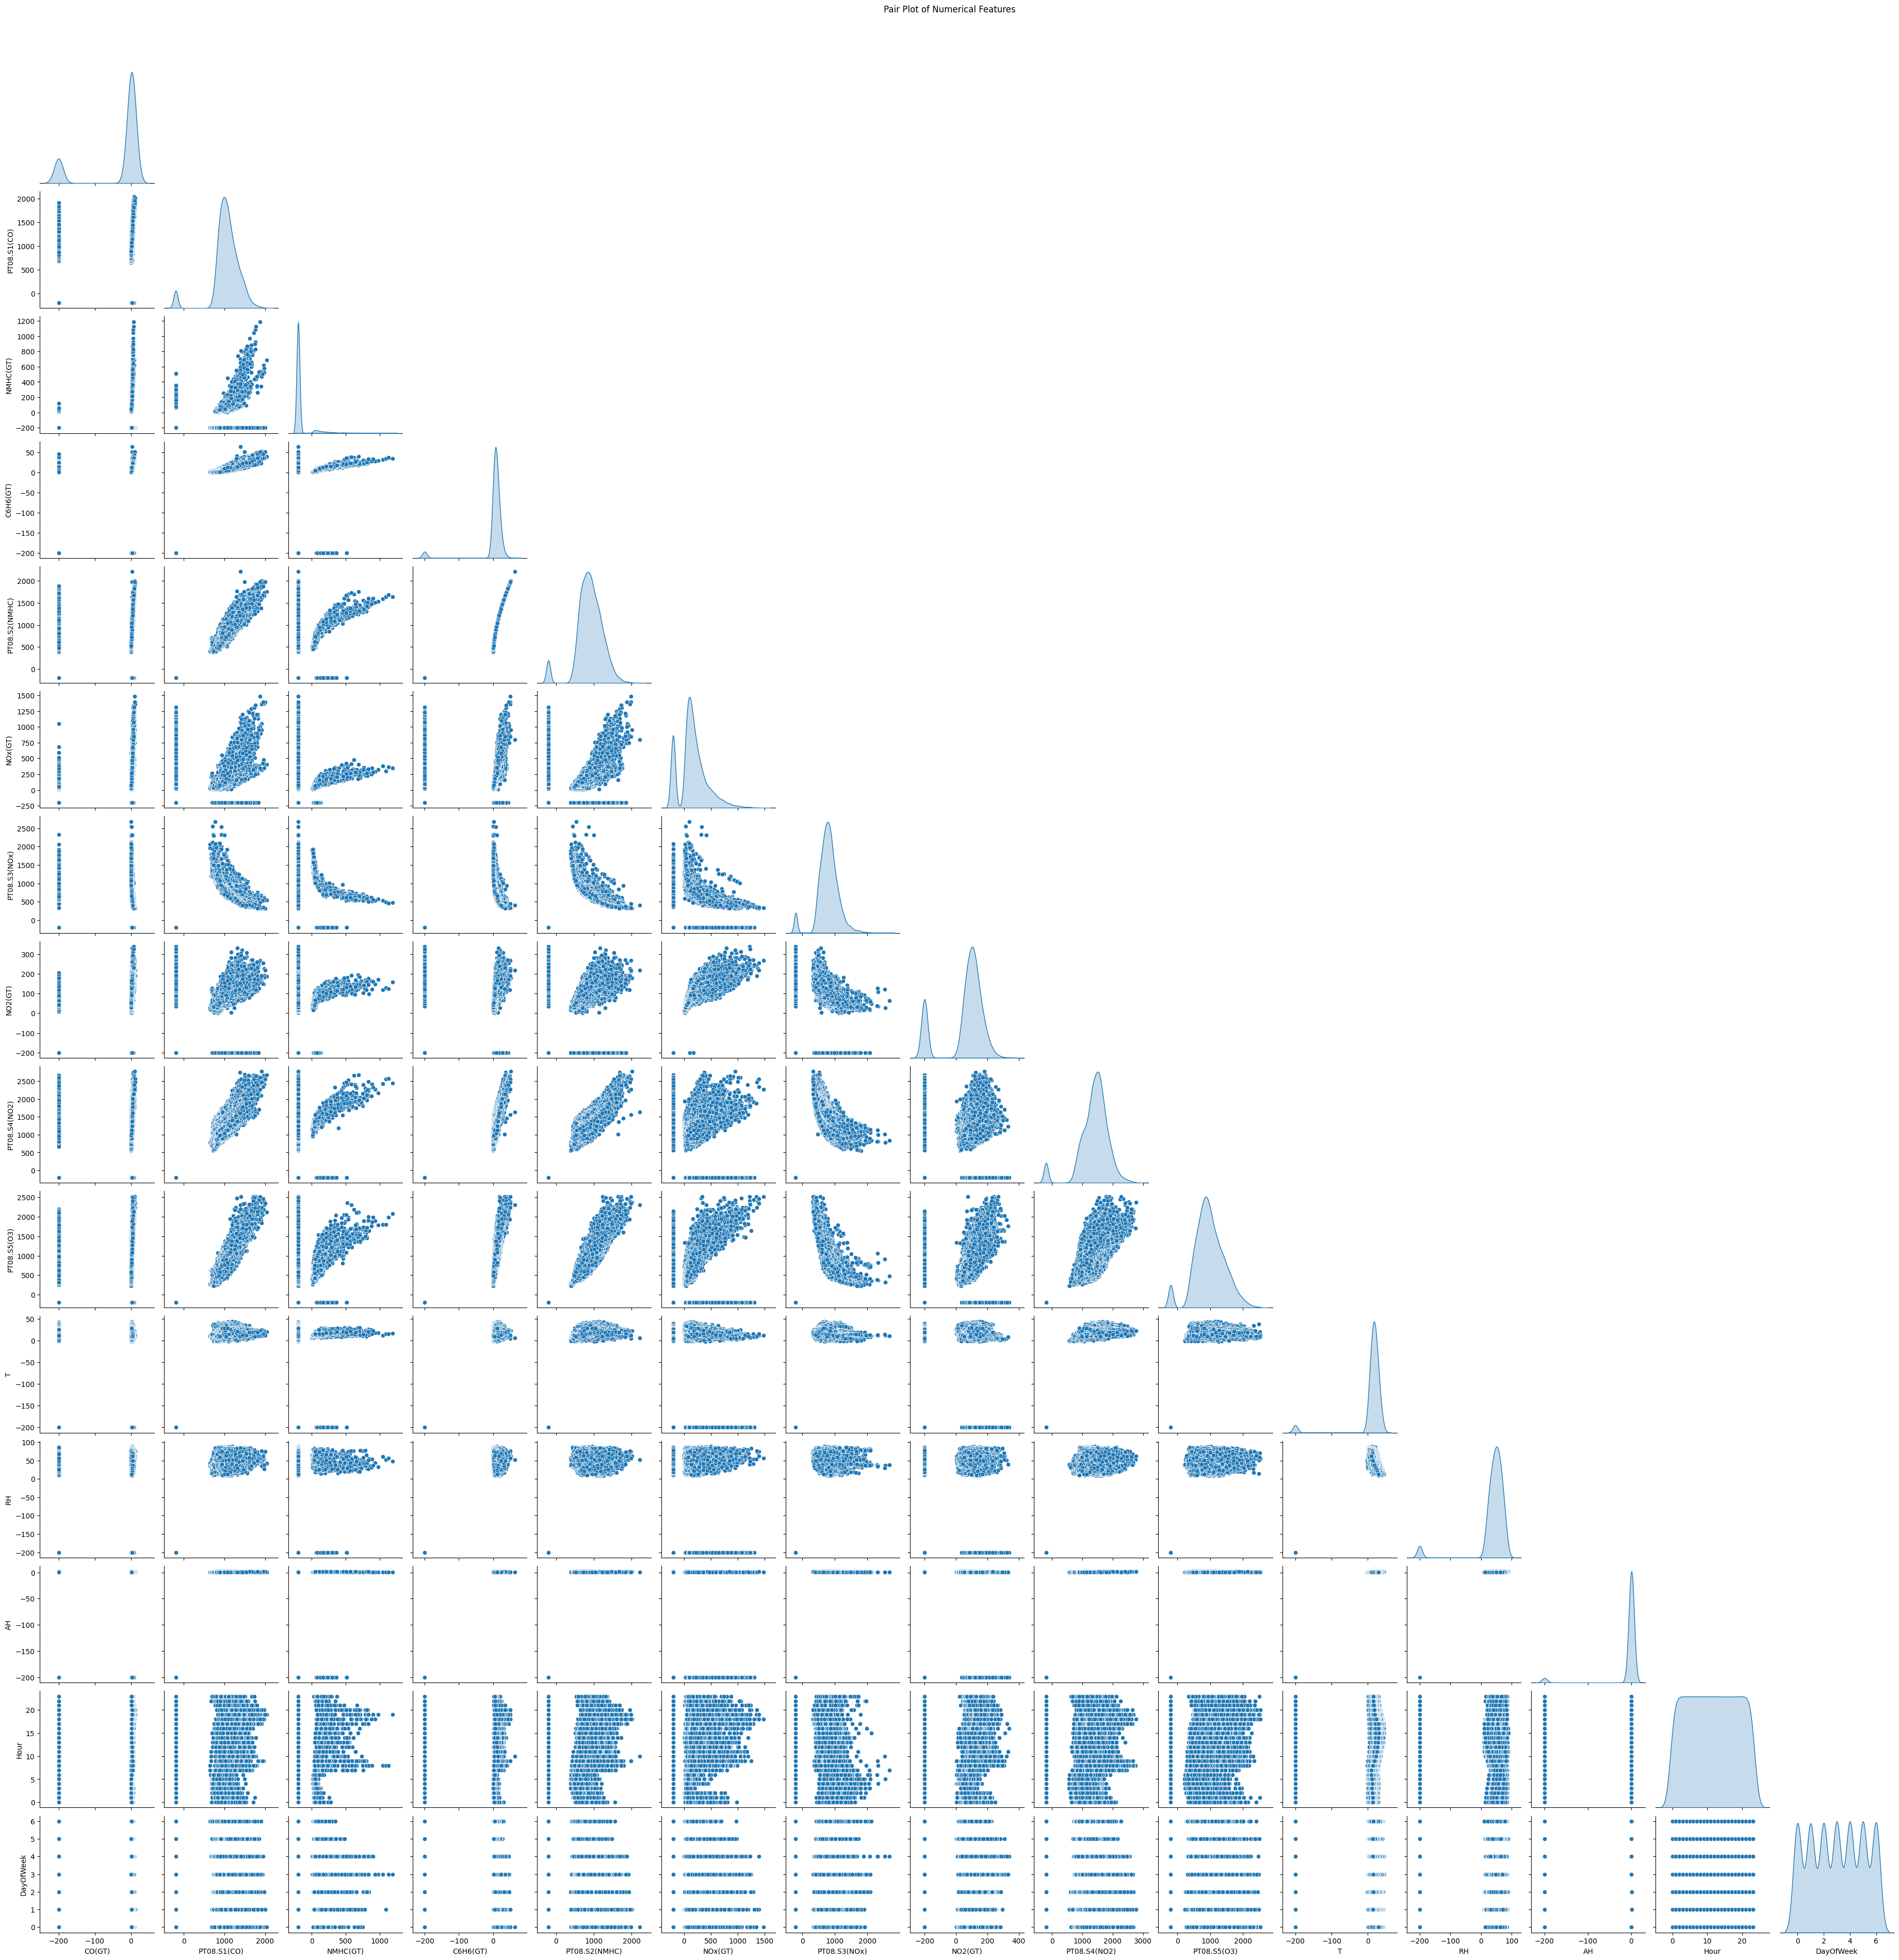

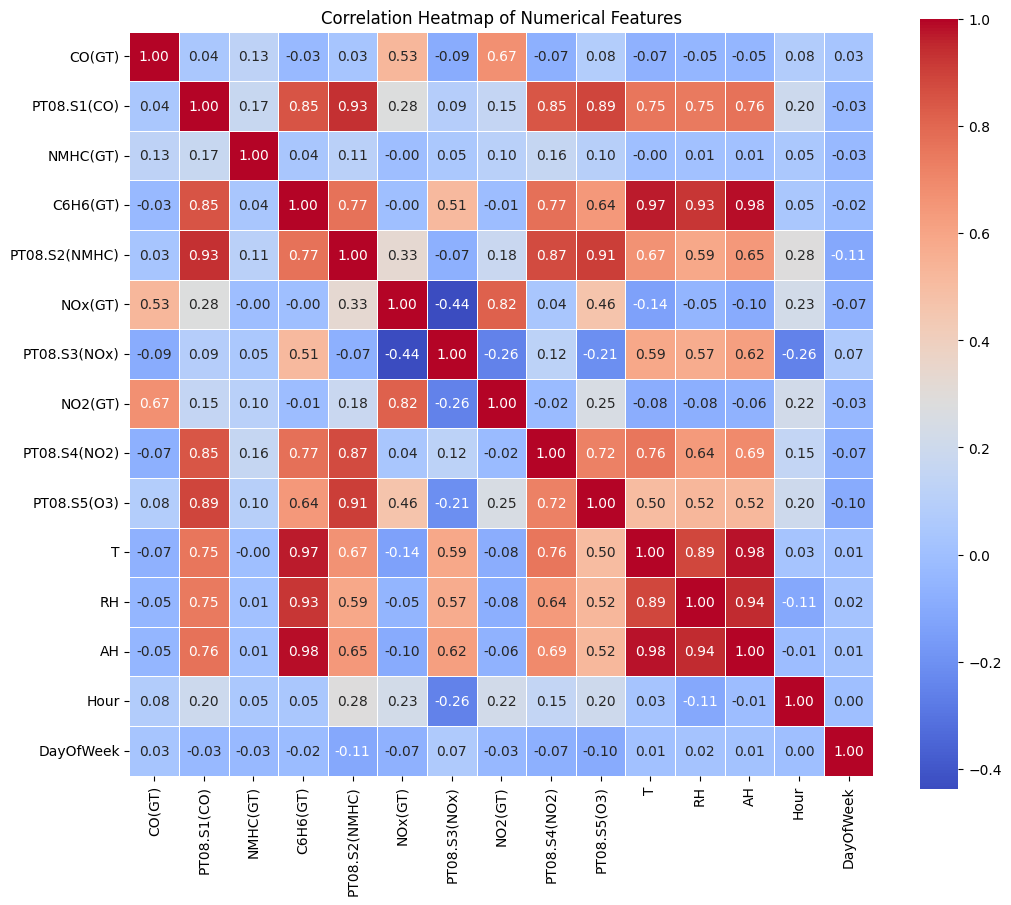

In [ ]:
# Select only numerical columns for analysis
numerical_data = df.select_dtypes(include=[np.number])

# 1. Pair Plot
sns.pairplot(numerical_data, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

d.Time Series Visualization


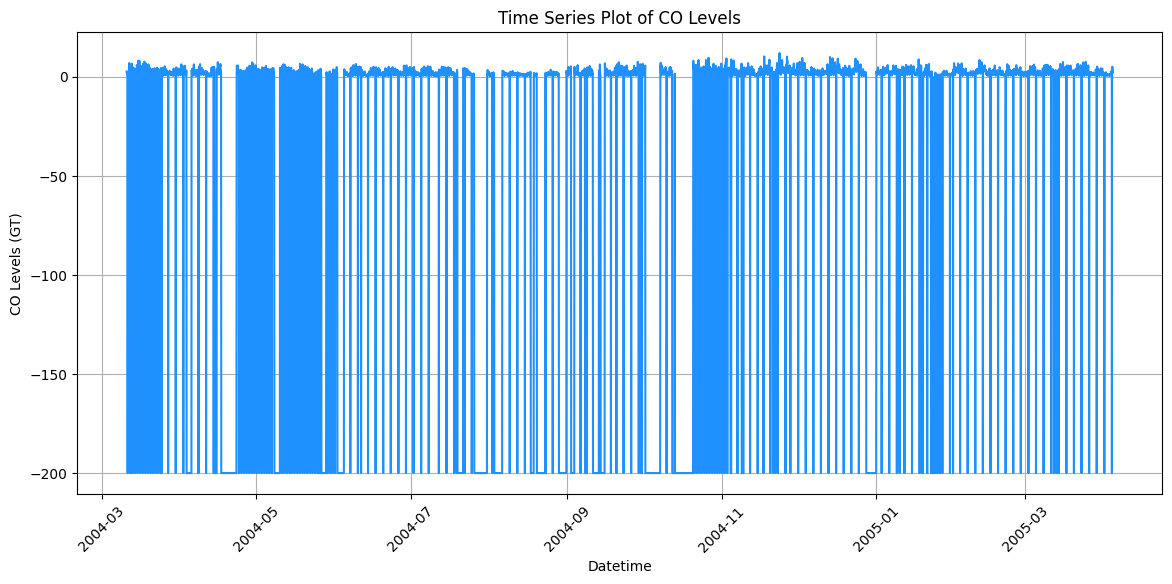

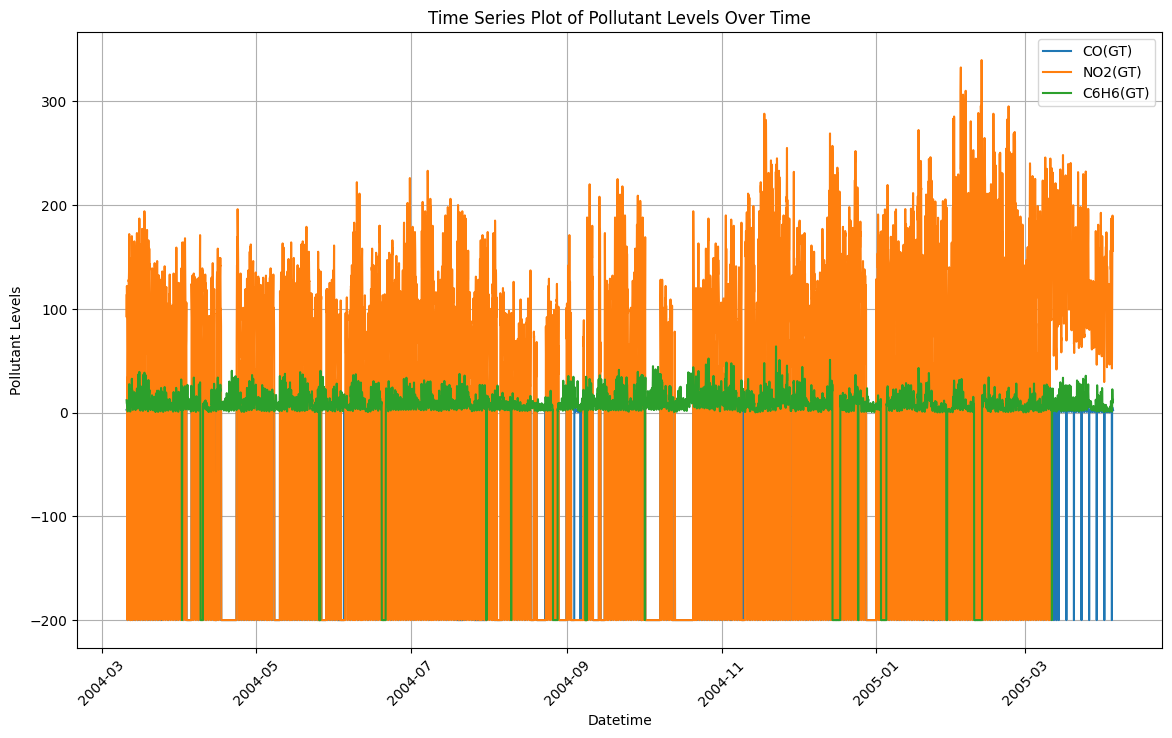

In [ ]:
# Check for date and time columns to create a datetime index
if 'Date' in df.columns and 'Time' in df.columns:
    # Combine 'Date' and 'Time' columns into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
else:
    print("The dataset does not contain 'Date' and 'Time' columns.")

# Check if 'Datetime' column was created and drop rows with NaT values in 'Datetime'
if 'Datetime' in df.columns:
    df = df.dropna(subset=['Datetime'])
    df.set_index('Datetime', inplace=True)
else:
    print("The 'Datetime' column could not be created. Please check the 'Date' and 'Time' columns.")

if 'CO(GT)' in df.columns:
    # 1. Plot CO levels over time
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['CO(GT)'], color='dodgerblue')
    plt.title("Time Series Plot of CO Levels")
    plt.xlabel("Datetime")
    plt.ylabel("CO Levels (GT)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("The target column 'CO(GT)' does not exist in the dataset.")

# 2. Additional Time Series Plots for Other Pollutants
pollutants = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)']

plt.figure(figsize=(14, 8))
for pollutant in pollutants:
    if pollutant in df.columns:
        sns.lineplot(x=df.index, y=df[pollutant], label=pollutant)

plt.title("Time Series Plot of Pollutant Levels Over Time")
plt.xlabel("Datetime")
plt.ylabel("Pollutant Levels")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

e.Distribution of Data

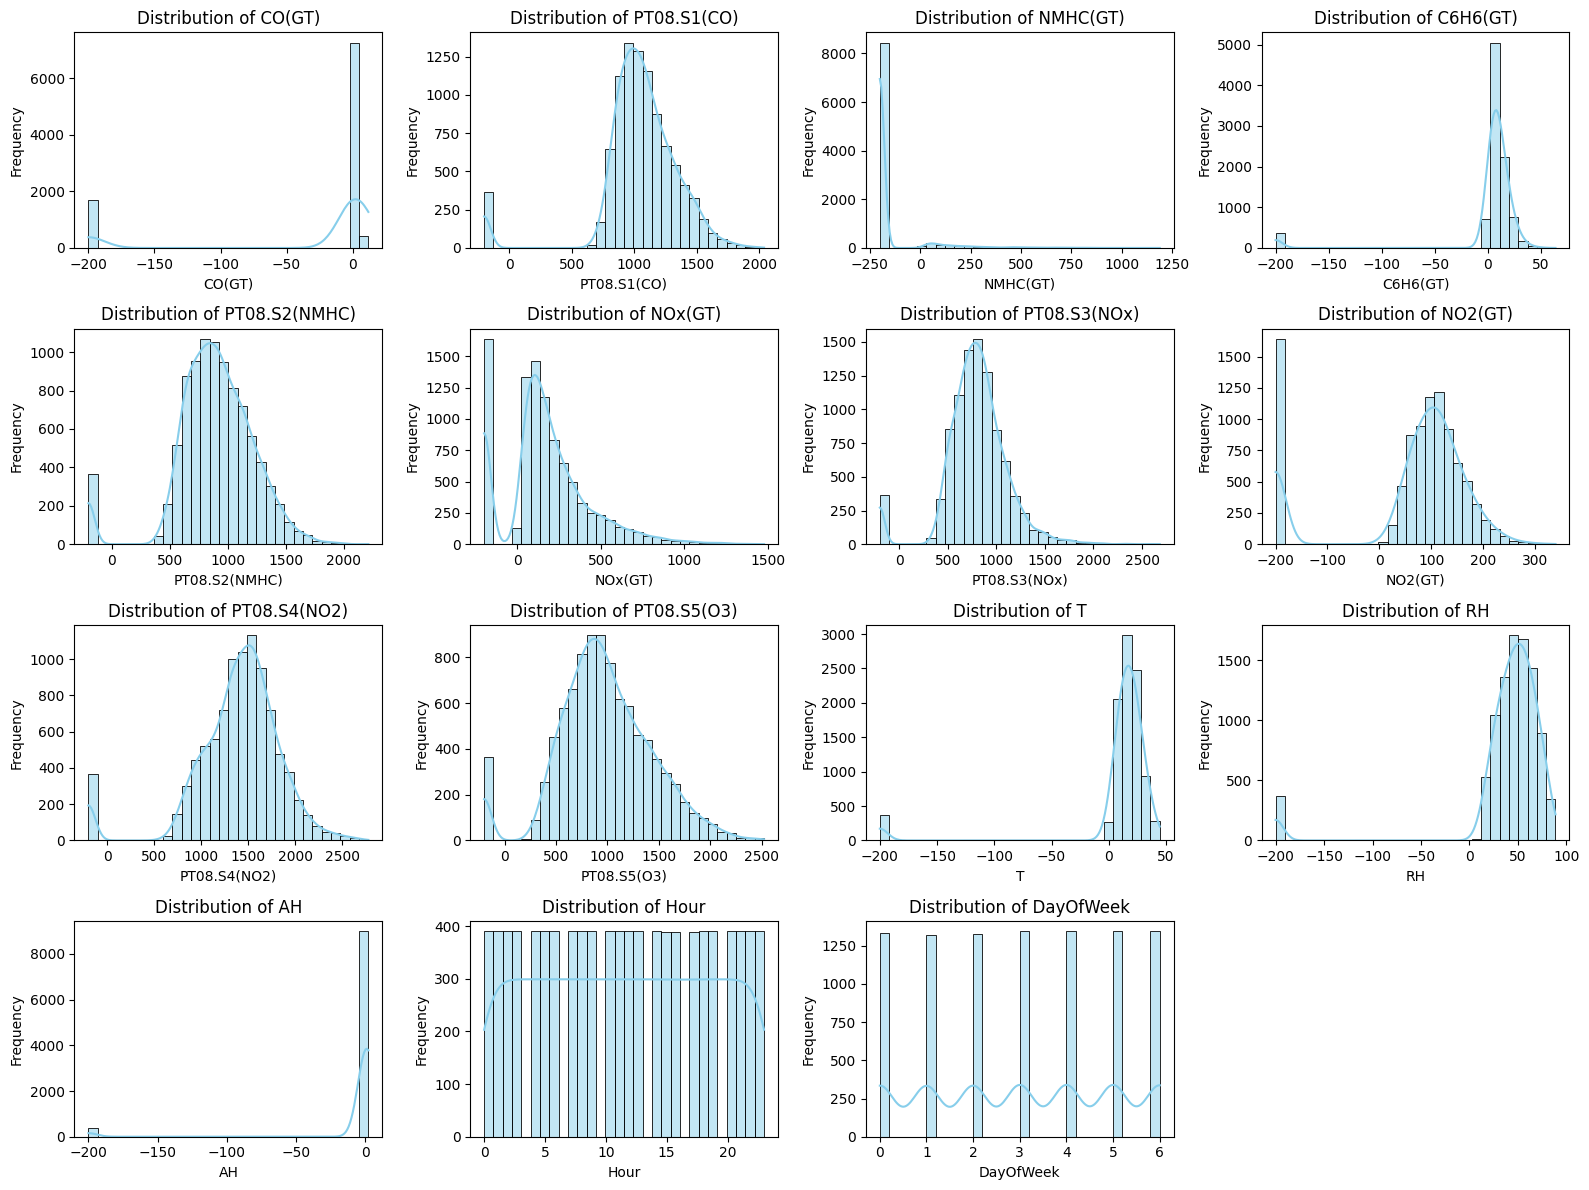

In [ ]:


# Select numerical columns for distribution analysis
numerical_data = df.select_dtypes(include=[np.number])

# Plot distribution for each numerical column
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, color="skyblue", bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

f.Feature Importance

<ipython-input-19-bb9acb1a85a0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


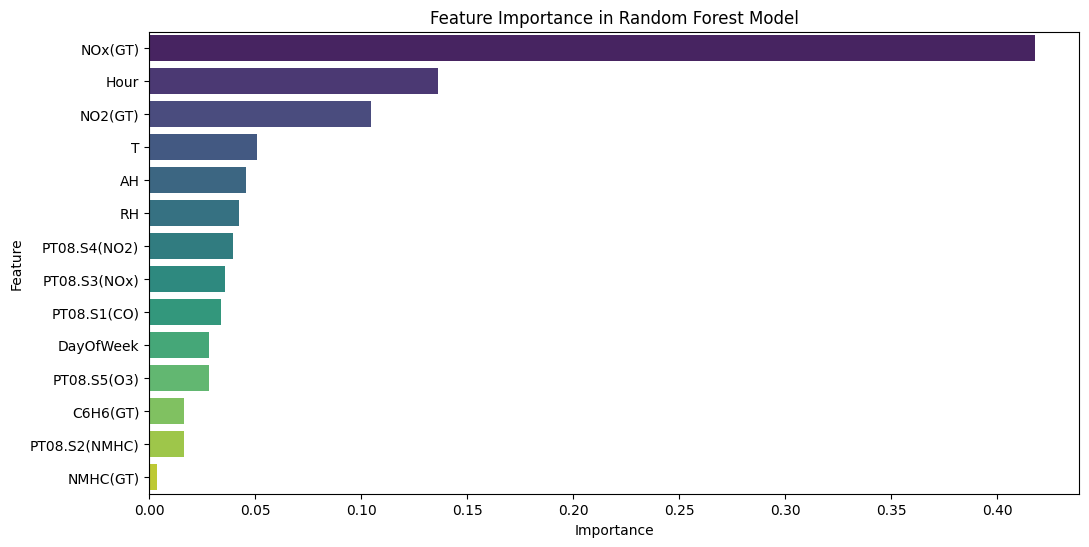

In [ ]:
target = 'CO(GT)'


numerical_data = df.select_dtypes(include=[np.number])
features = numerical_data.drop(columns=[target])
X = features
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


feature_importances = model.feature_importances_


importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# MODEL TRAINING

Now we are taining model to predict CO levels(CO(GT)) using Random Foreset Regressor.

In [ ]:

target = 'CO(GT)'

# Selecting numerical features and the target column
numerical_data = df.select_dtypes(include=[np.number])
features = numerical_data.drop(columns=[target])
X = features
y = df[target]

# Handle missing values (drop or impute)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 17.58
Mean Squared Error (MSE): 1607.50
Root Mean Squared Error (RMSE): 40.09
R^2 Score: 0.72


Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R^2 Score: {r2_tuned:.2f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R^2 Score: 0.6451069729838504

Tuned Model Performance:
Mean Absolute Error (MAE): 20.37
Mean Squared Error (MSE): 1686.66
Root Mean Squared Error (RMSE): 41.07
R^2 Score: 0.71


Comparing the other models:

1. Random Forest
2. Decision Tree
3. XGBoost
4. LightBGM
5. K-Nearest Neighbours(KNN)

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models and their parameter grids
model_param_grid = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
        }
    }
}

# Store results for each model
best_params = {}
performance_metrics = {}

for model_name, model_info in model_param_grid.items():
    print(f"Tuning hyperparameters for {model_name}...")

    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=3,
        scoring='r2',
        verbose=1,
        n_jobs=-1
    )

    # Fit the model on training data
    grid_search.fit(X_train, y_train)

    # Save the best parameters and the best estimator
    best_params[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save performance metrics
    performance_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Performance Metrics for {model_name}: {performance_metrics[model_name]}")
    print("------------------------------------------------------")

# Print Summary
print("\nSummary of Best Parameters and Performance Metrics:")
for model_name in best_params.keys():
    print(f"{model_name} Best Parameters: {best_params[model_name]}")
    print(f"{model_name} Performance Metrics: {performance_metrics[model_name]}")

Tuning hyperparameters for RandomForest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Performance Metrics for RandomForest: {'MAE': 17.513811499320955, 'MSE': 1588.7842338113844, 'RMSE': 39.85955636746832, 'R2': 0.7272056126078773}
------------------------------------------------------
Tuning hyperparameters for GradientBoosting...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Performance Metrics for GradientBoosting: {'MAE': 20.255968703023456, 'MSE': 1712.6465119063819, 'RMSE': 41.3841335768478, 'R2': 0.7059384489774451}
------------------------------------------------------
Tuning hyperparameters for SVR...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters f